## Author :- Muskan Madaan

## Organisation: The Sparks Foundation
## Data Science and Business Analytics Internship

## Task 2: Prediction Using Unsupervised ML.
## The optimum number of clusters and represent it visually from Iris Dataset 

## Importing libraries and dataset

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

In [4]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Visualizing data 

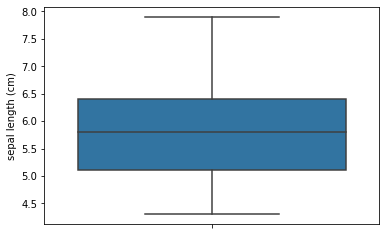

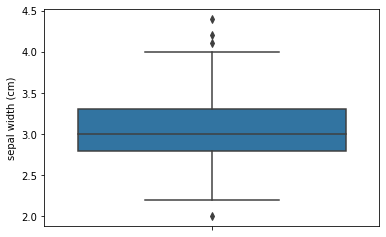

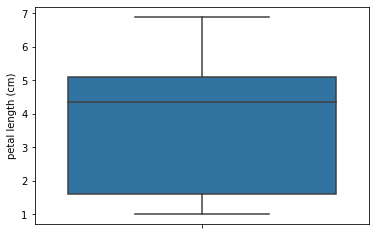

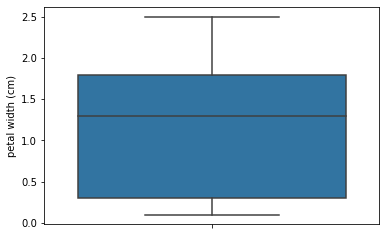

In [14]:
df1 = df.copy()
for i in df1:
    sns.boxplot(y=df1[i])
    plt.show()

There are some outlier values present at sepal width column.

## Removing outlier values using IQR technique.

In [15]:
q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+1.5*iqr
print(lb)
print(ub)

2.05
4.05


In [16]:
df = df[(df['sepal width (cm)']>=lb) & (df['sepal width (cm)']<=ub)]
df.shape

(146, 4)

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


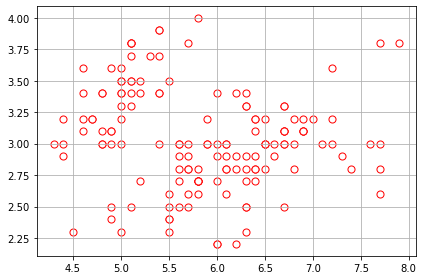

In [24]:
y = iris.target
plt.scatter(df.iloc[:,0].values,df.iloc[:,1].values,color='white',marker='o',edgecolor='red',s=50)
plt.grid()
plt.tight_layout()
plt.show()

### Finding optimum number of clusters for K-means classifier using Elbow method.
Elbow method is used to determine number of clusters.

In [25]:
x = df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss= []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

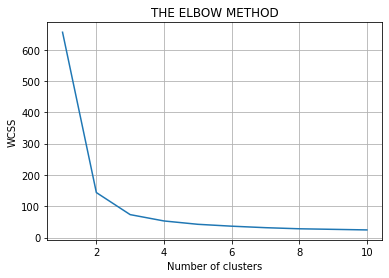

In [26]:
plt.plot(range(1,11),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

In [27]:
for i in range(1,10):
    print(i,'->',wcss[i])

1 -> 143.89187500000008
2 -> 73.47869237971102
3 -> 53.26700546690307
4 -> 42.61121112929623
5 -> 36.59785757575759
6 -> 31.831534343434356
7 -> 28.307284210526337
8 -> 26.50680402404613
9 -> 24.682667099567105


### we can see that the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph. Let’s implement k-means using k=3

In [31]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2 2 2 1 1
 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 1]


In [32]:
df['Class']=y_kmeans
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Visualising the clusters

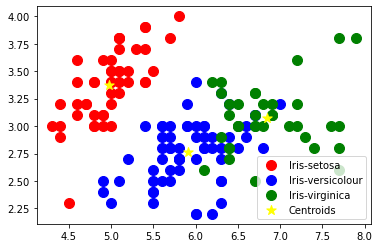

In [30]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids',marker='*')
plt.legend()

## Thank you!